In [1]:
from mflex.load.read_file import read_fits_soar
from mflex.model.field.bfield_model import magnetic_field
import numpy as np
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import deltapres, deltaden
from mflex.plot.plot_magnetogram import plot_fieldlines_soar
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
)
from datetime import datetime
from mflex.model.field.save import save_field

xmax, ymax, zmax 144.79999999999998 90.5 20.0
xmax_Mm, ymax_Mm, zmax_Mm 144.79999999999998 90.5 20.0
nresol_x, nresol_y, nresol_z 800 500 222
pixelsize_x, pixelsize_x_Mm 0.181 0.181
pixelsize_y, pixelsize_y_Mm 0.181 0.181
pixelsize_z, pixelsize_z_Mm 0.181 0.181


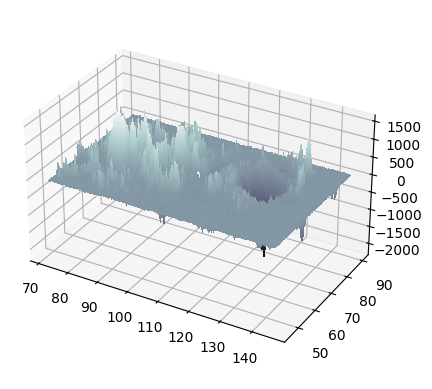

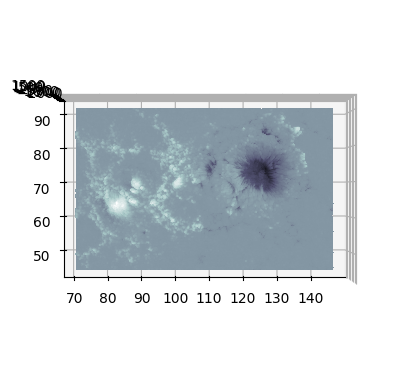

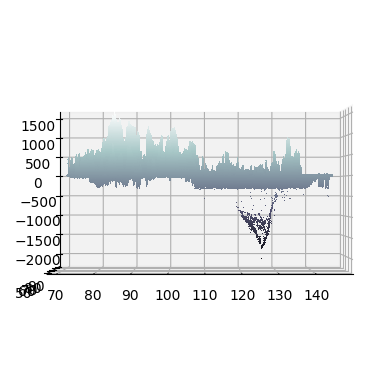

Bz z=0 Maximum 1594.516
Bz z=0 Minimum -2252.8496
z0, deltaz 2.0 0.2
length scale 2.0
length scale x 289.59999999999997
length scale y 181.0
length scale x norm 144.79999999999998
length scale y norm 90.5
xmin, xmax, ymin, ymax, zmin, zmax  0.0 144.79999999999998 0.0 90.5 0.0 20.0
0.0004707199681542727
0.48300475751779004


In [2]:
L = 1.0

path_blos = (
    "/Users/lilli/Desktop/SOAR/obs/solo_L2_phi-hrt-blos_20220307T000609_V01.fits"
)
data = read_fits_soar(path_blos, L)

data_bz = data.data_z
# data_by: np.ndarray[np.float64, np.dtype[np.float64]] = data.data_y
# data_bx: np.ndarray[np.float64, np.dtype[np.float64]] = data.data_x
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

a = 0.001
alpha = 0.001
b = 1.0

deltaz = z0 / 10.0
x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap="bone",
)
ax.set_box_aspect((xmax, ymax, 4 * zmax))
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap="bone",
)
ax.view_init(90, -90)
ax.set_box_aspect((xmax, ymax, 4 * zmax))
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap="bone",
)
ax.view_init(0, -90)
ax.set_box_aspect((xmax, ymax, 4 * zmax))
plt.show()

print("Bz z=0 Maximum", data_bz.max())
print("Bz z=0 Minimum", data_bz.min())

print("z0, deltaz", z0, deltaz)
length_scale = 2 * L 

length_scale_x = 2.0 * nresol_x * pixelsize_x * L
length_scale_y = 2.0 * nresol_y * pixelsize_y * L

length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

print("length scale", length_scale)
print("length scale x", length_scale_x)
print("length scale y", length_scale_y)
print("length scale x norm", length_scale_x_norm)
print("length scale y norm", length_scale_y_norm)

if xmin != 0.0 or ymin != 0.0 or zmin != 0.0:
    raise ValueError("Magnetogram not centred at origin")
if not (xmax > 0.0 or ymax > 0.0 or zmax > 0.0):
    raise ValueError("Magnetogram in wrong quadrant of Seehafer mirroring")

print("xmin, xmax, ymin, ymax, zmin, zmax ", xmin, xmax, ymin, ymax, zmin, zmax)

x_arr = np.arange(2.0 * nresol_x) * 2.0 * xmax / (2.0 * nresol_x - 1) - xmax
y_arr = np.arange(2.0 * nresol_y) * 2.0 * ymax / (2.0 * nresol_y - 1) - ymax
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

ratiodzls = deltaz / length_scale  # Normalised deltaz

alpha = alpha * length_scale / L
# alpha_issi / L_issi = alpha_lilli / L_lilli,See = alpha_lilli / (2*L_lilli)
# means that we have alpha_lilli = 2* alpha_issi * L_lilli / L_issi
# with hopefully L_lilli / L_issi = length_scale / (2 L) = 1.0

# kx, ky arrays, coefficients for x and y in Fourier series

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]

ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]

one_arr = 0.0 * np.arange(nf_max) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max] 

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

print(k2_arr.min())

print((k2_arr.min() - (2*alpha)**2.0)/ (2*k2_arr.min()))

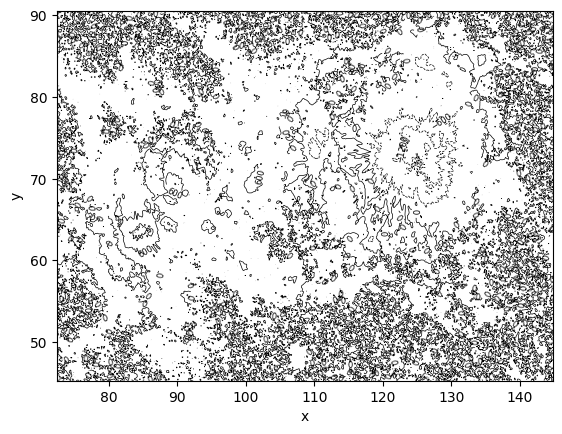

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    6,
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=6, inline=True)
plt.show()

In [4]:
z0_b = z0
deltaz_b = deltaz * 10.0

bfield, dpartial_bfield = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L
)


length scale 2.0
length scale x 289.59999999999997
length scale y 181.0
length scale x norm 144.79999999999998
length scale y norm 90.5
xmin, xmax, ymin, ymax, zmin, zmax  0.0 144.79999999999998 0.0 90.5 0.0 20.0


KeyboardInterrupt: 

In [ ]:

save_field(bfield, dpartial_bfield, "solo_L2_phi-hrt-blos_20220307T000609_V01_" + str(a) + "_" + str(alpha) + "_" + str(b))


In [ ]:
print("z0", z0)
print("deltaz", deltaz)
print("z0 B", z0_b)
print("deltaz B", deltaz_b)

z0 2.0
deltaz 0.2
z0 B 2.0
deltaz B 2.0


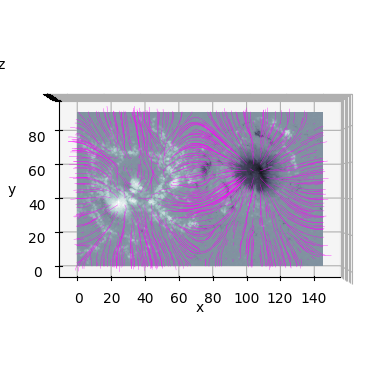

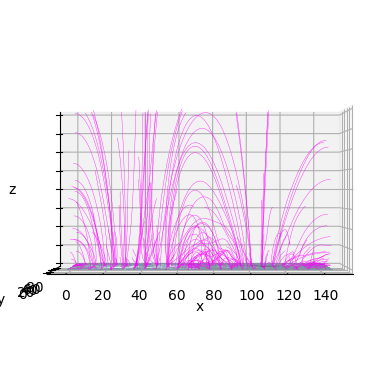

In [ ]:
h1 = L / 100.0 # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = L # Maximum step length for fieldline3D

plot_fieldlines_soar(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=4.0,
    view = "top",
)

plot_fieldlines_soar(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=6.0,
    view = "side",
)

In [ ]:
t_photosphere = 5600.0  # Temperature at z = 0 (on photosphere) in Kelvin
t_corona = 2.0 * 10.0**6  # Temperature at z = 2.0 (at 20 Mm) in Kelvin
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (
    1.0 + np.tanh(z0 / deltaz)
)  # Temperature at z = z0 in Kelvin
t1 = (t_corona - t_photosphere) / (
    1.0 + np.tanh(z0 / deltaz)
)
g_solar = 272.2
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 * L**-1
)  # pressure scale height in 10^4 km (10**-6 to convert to Mm, and 10**-1 to convert to 10Mm = 10^4 km)
rho0 = 2.7 * 10**-4  # plasma density at z = 0 in kg/(m^3)
b0 = 2252.8496  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere
b = 1.0

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

z0, deltaz, h, t0, t1 2.0 0.2 30.409704552141473 1002799.9979446176 997200.0020553825


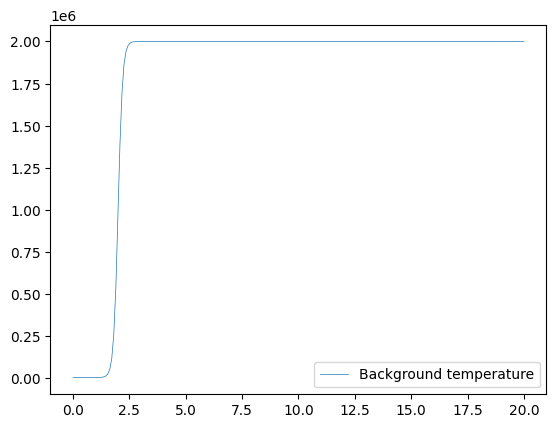

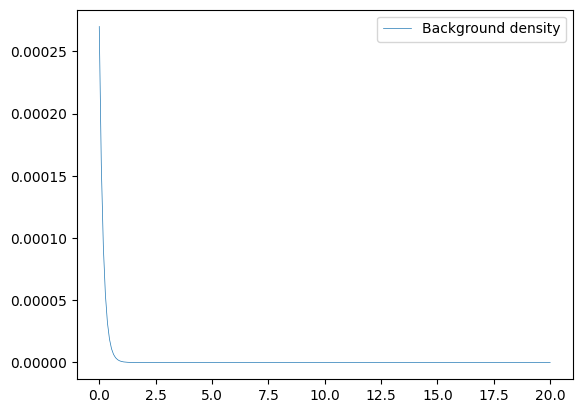

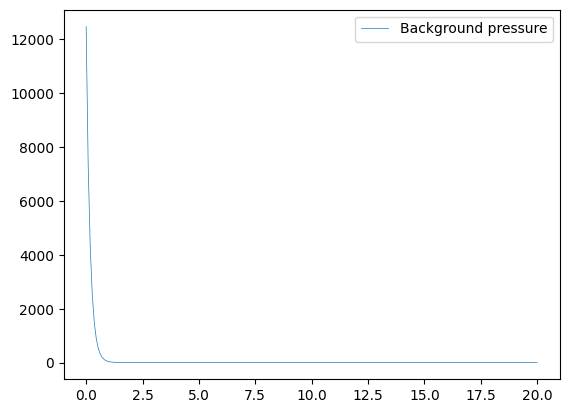

In [ ]:
backpres = 0.0 * z_arr
backtemp = 0.0 * z_arr
backden = 0.0 * z_arr

print("z0, deltaz, h, t0, t1", z0, deltaz, h, t0, t1)
for iz in range(nresol_z):
    z = z_arr[iz]
    backpres[iz] = (
        b0**2.0 / mu0 * 0.5 * beta0 * 10**-8 * bpressure(z, z0, deltaz, h, t0, t1)
    )
    backden[iz] = (
        0.5
        * beta0
        / h
        * t0
        / t_photosphere
        * b0**2.0
        / (mu0 * g_solar * L)
        * 10**-14
        * bdensity(z, z0, deltaz, h, t0, t1)
    )
    backtemp[iz] = btemp(z, z0, deltaz, t0, t1)
plt.plot(z_arr, backtemp, label="Background temperature", linewidth=0.5)
plt.legend()
plt.show()
plt.plot(z_arr, backden, label="Background density", linewidth=0.5)
plt.legend()
plt.show()
plt.plot(z_arr, backpres, label="Background pressure", linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
fpres_3d = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a, b, bz) / mu0 * 10**-8
            )
            fden_3d[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )

print("Pressure minimum lin", fpres_3d.min())
print("Pressure minimum lin", fpres_3d.argmin())
print("Density minimum lin", fden_3d.min())
print("Density minimum lin", fden_3d.argmin())

Pressure minimum lin -4.545776488350512
Pressure minimum lin 7050194
Density minimum lin -1.83552663657247e-08
Density minimum lin 8251795


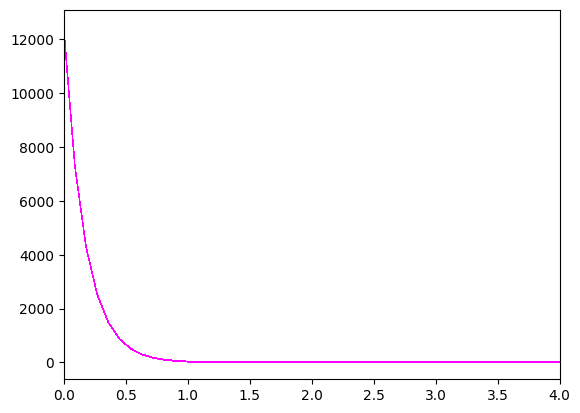

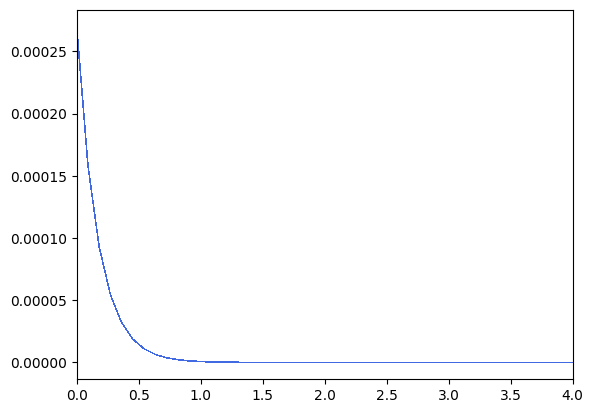

In [ ]:
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fpres_3d[:, iy, ix], linewidth=0.5, color="magenta", alpha=0.04
        )
plt.xlim([0, 2*z0])
plt.show()

for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fden_3d[:, iy, ix], linewidth=0.5, color="royalblue", alpha=0.04
        )
plt.xlim([0, 2*z0])
plt.show()

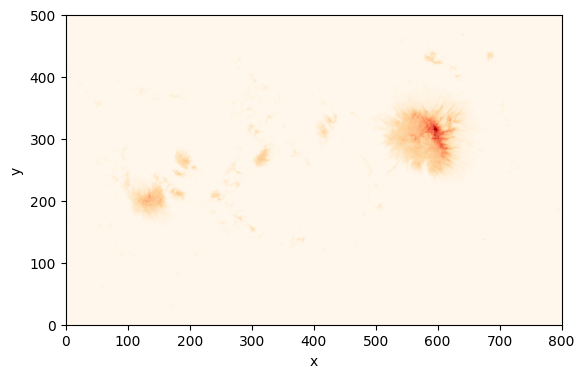

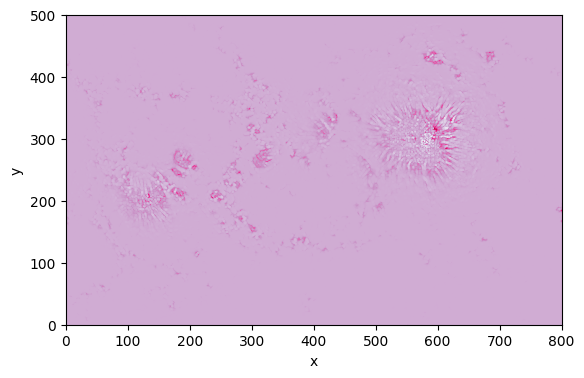

In [ ]:
x_arr = np.arange(nresol_x) * (nresol_x) / (nresol_x - 1)
y_arr = np.arange(nresol_y) * (nresol_y) / (nresol_y - 1)
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres_3d[0,:,:], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

x_arr = np.arange(nresol_x) * (nresol_x) / (nresol_x - 1)
y_arr = np.arange(nresol_y) * (nresol_y) / (nresol_y - 1)
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden_3d[0,:,:], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

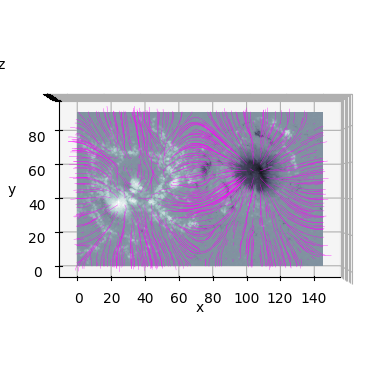

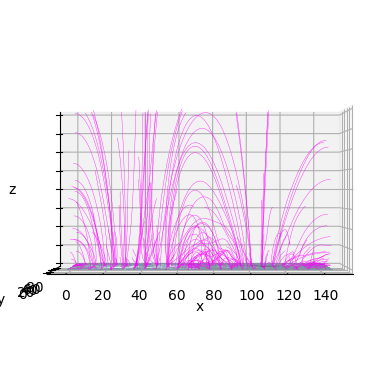

In [ ]:
bfield_test = np.load("/Users/lilli/Desktop/mflex/results/solo_L2_phi-hrt-blos_20220307T000609_V01_0.001_0.002_1.0_bfield3d.npy")

plot_fieldlines_soar(
    bfield_test,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=4.0,
    view = "top",
)

plot_fieldlines_soar(
    bfield_test,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=6.0,
    view = "side",
)
